In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:\\Users\\dsadm\\Desktop\\raphael\\IABD-1\\somativa\\dadosacoes.csv')
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [9]:
df.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [17]:
action_name = df["nome ação"]
market_value = df["valor de mercado R$ -(Bilhões)"]

c:\Users\dsadm\Desktop\raphael\IABD-1\aula-9-detecção-de-fraude\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\Desktop\raphael\IABD-1\aula-9-detecção-de-fraude\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\Desktop\raphael\IABD-1\aula-9-detecção-de-fraude\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Valor de mercado')

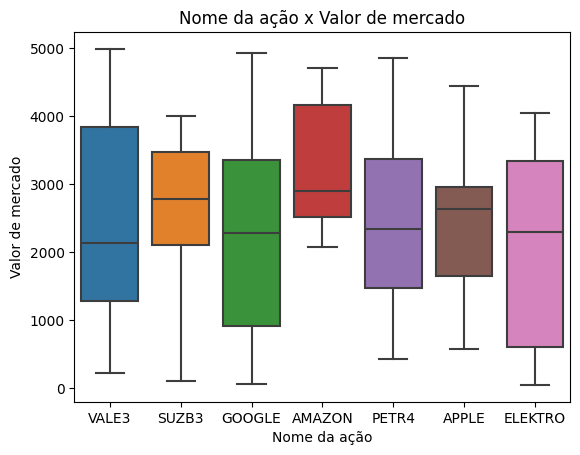

In [18]:
sns.boxplot(x=action_name, y=market_value,)
plt.title("Nome da ação x Valor de mercado")
plt.xlabel("Nome da ação")
plt.ylabel("Valor de mercado")

In [13]:
df.dropna(axis=0)
dados_acoes = pd.get_dummies(df, columns=['nome ação'])

dados_acoes

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_AMAZON,nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,False,True,False
4,212,9,2975,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,208,78,3035,False,False,False,False,False,True,False
96,253,60,3263,False,False,False,False,False,False,True
97,99,35,980,False,False,False,True,False,False,False
98,82,43,1866,False,False,False,False,False,False,True


In [16]:
dados_acoes = pd.get_dummies(df, columns=['nome ação'], drop_first= True)
dados_acoes

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
95,208,78,3035,False,False,False,False,True,False
96,253,60,3263,False,False,False,False,False,True
97,99,35,980,False,False,True,False,False,False
98,82,43,1866,False,False,False,False,False,True


In [20]:
features = dados_acoes[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)

c:\Users\dsadm\Desktop\raphael\IABD-1\aula-9-detecção-de-fraude\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Unknown projection '2d'

<Figure size 1500x1500 with 0 Axes>